In [6]:
import torch
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from celluloid import Camera
import datetime


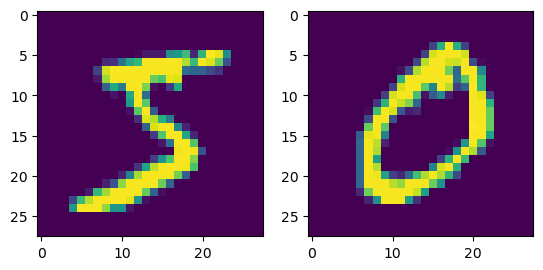

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

imgs = training_data.data[:2] / 255.0

_, axs = plt.subplots(nrows=1, ncols=2)
for ax, img in zip(axs, imgs):
    ax.imshow(img.view([28, 28]))

In [5]:
def plot_distribution_and_image(mu1, sigma1, mu2, sigma2, img1, img2):
    d1 = torch.distributions.Normal(mu1, sigma1)
    d2 = torch.distributions.Normal(mu2, sigma2)

    x1 = torch.linspace(mu1 - 5, mu1 + 5, 100)
    x2 = torch.linspace(mu2 - 5, mu2 + 5, 100)

    y1 = d1.log_prob(x1).exp()
    y2 = d2.log_prob(x2).exp()

    fig, ax = plt.subplots()
    ax.plot(x1, y1)
    ax.plot(x2, y2)

    img1 = OffsetImage(img1, zoom=2.2)
    ab1 = AnnotationBbox(img1, (1, 0), xybox=(mu1, 2), xycoords="data")
    ax.add_artist(ab1)

    img2 = OffsetImage(img2, zoom=2.2)
    ab2 = AnnotationBbox(img2, (1, 0), xybox=(mu2, 2), xycoords="data")
    ax.add_artist(ab2)

    s1, _ = d1.sample([20]).sort()
    sy1 = d1.log_prob(s1).exp()
    t1 = torch.linspace(mu1 - 1, mu1 + 1, 20)
    for s, sy, t in zip(s1, sy1, t1):
        ax.arrow(s, sy, t - s, 1.65 - sy, head_width=0.04, color='red')

    s2, _ = d2.sample([20]).sort()
    sy2 = d2.log_prob(s2).exp()
    t2 = torch.linspace(mu2 - 1, mu2 + 1, 20)
    for s, sy, t in zip(s2, sy2, t2):
        ax.arrow(s, sy, t - s, 1.65 - sy, head_width=0.04, color='blue')



In [18]:
def video_distribution_and_image(mu1, sigma1, mu2, sigma2, img1, img2, file_name):
    d1 = torch.distributions.Normal(mu1, sigma1)
    d2 = torch.distributions.Normal(mu2, sigma2)

    x1 = torch.linspace(mu1 - 5, mu1 + 5, 100)
    x2 = torch.linspace(mu2 - 5, mu2 + 5, 100)

    y1 = d1.log_prob(x1).exp()
    y2 = d2.log_prob(x2).exp()

    fig, ax = plt.subplots()
    plt.ylim([-0.25, 2])

    camera = Camera(fig)

    img1 = OffsetImage(img1, zoom=2.2)
    ab1 = AnnotationBbox(img1, (1, 0), xybox=(mu1, 2), xycoords="data")

    img2 = OffsetImage(img2, zoom=2.2)
    ab2 = AnnotationBbox(img2, (1, 0), xybox=(mu2, 2), xycoords="data")

    for _ in range(30):
        ax.plot(x1, y1, color='magenta')
        ax.plot(x2, y2, color='cyan')
        
        ax.add_artist(ab1)

        ax.add_artist(ab2)

        s1, _ = d1.sample([20]).sort()
        sy1 = d1.log_prob(s1).exp()
        t1 = torch.linspace(mu1 - 1, mu1 + 1, 20)
        for s, sy, t in zip(s1, sy1, t1):
                ax.arrow(s, sy, t - s, 1.65 - sy, head_width=0.04, color='red')

        s2, _ = d2.sample([20]).sort()
        sy2 = d2.log_prob(s2).exp()
        t2 = torch.linspace(mu2 - 1, mu2 + 1, 20)
        for s, sy, t in zip(s2, sy2, t2):
                ax.arrow(s, sy, t - s, 1.65 - sy, head_width=0.04, color='blue')

        camera.snap()

    animation = camera.animate()
    animation.save(
        f'./video/{datetime.datetime.today().strftime("%Y-%m-%d %H:%M:%S")} {file_name}.mp4'
    )

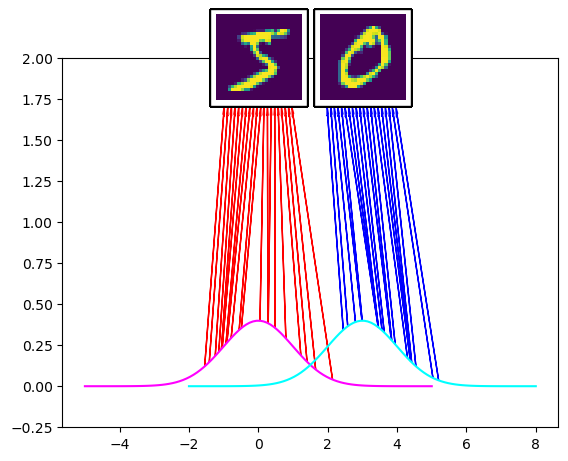

In [17]:
video_distribution_and_image(0, 1, 3, 1, imgs[0], imgs[1], '1sigma')

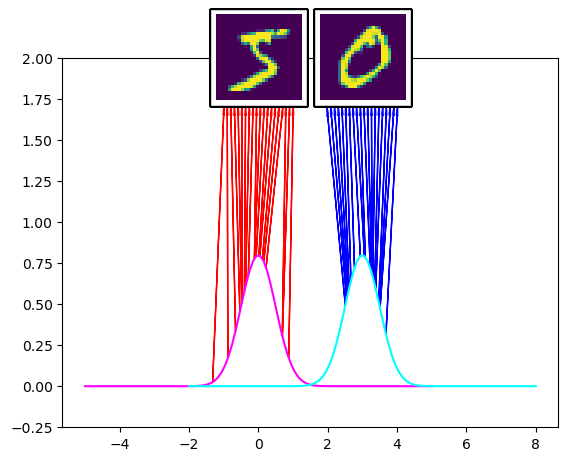

In [19]:
video_distribution_and_image(0, 0.5, 3, 0.5, imgs[0], imgs[1], '1sigma')

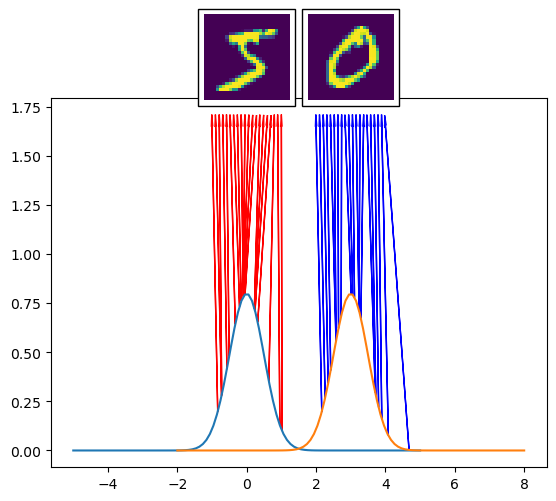

In [94]:
plot_distribution_and_image(0, 0.5, 3, 0.5, imgs[0], imgs[1])

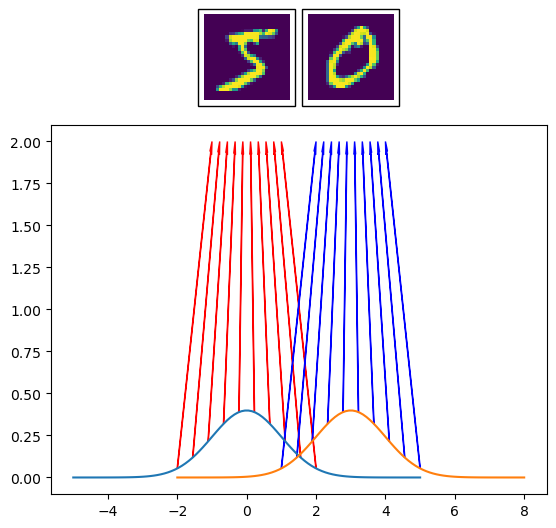

In [62]:
x = torch.linspace(-5, 5, 100)
d = torch.distributions.Normal(0, 1)
y = d.log_prob(x).exp()

a = torch.linspace(-2, 2, 10)
b = torch.linspace(-1, 1, 10)

fig, ax = plt.subplots()
ax.plot(x, y)
for aa, bb in zip(a, b):
    ax.arrow(
        aa,
        d.log_prob(aa).exp(),
        bb - aa,
        2 - d.log_prob(aa).exp(),
        width=0.01,
        head_width=0.05,
        length_includes_head=True,
        color="red",
    )

im = OffsetImage(imgs[0], zoom=2.2)
# ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction', box_alignment=(1.1,-0.1))
ab = AnnotationBbox(
    im,
    (1, 0),
    xybox=(-0.0, 2.5),
    xycoords="data",
    # boxcoords="offset points",
)
ax.add_artist(ab)

x = torch.linspace(-2, 8, 100)
d = torch.distributions.Normal(3, 1)
y = d.log_prob(x).exp()

a = torch.linspace(1, 5, 10)
b = torch.linspace(2, 4, 10)

ax.plot(x, y)
for aa, bb in zip(a, b):
    ax.arrow(
        aa,
        d.log_prob(aa).exp(),
        bb - aa,
        2 - d.log_prob(aa).exp(),
        width=0.01,
        head_width=0.05,
        length_includes_head=True,
        color="blue",
    )

im = OffsetImage(imgs[1], zoom=2.2)
# ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction', box_alignment=(1.1,-0.1))
ab = AnnotationBbox(
    im,
    (1, 0),
    xybox=(3.0, 2.5),
    xycoords="data",
    # boxcoords="offset points",
)
ax.add_artist(ab)
plt.show()

plt.show()